In [210]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [211]:
fraud = pd.read_csv("../data/processed/2-EDA/fraud.csv",delimiter=",")
non_fraud = pd.read_csv("../data/processed/2-EDA/non_fraud.csv",delimiter=",")

In [212]:
fraud.shape

(14873, 8)

In [213]:
non_fraud.shape

(50000, 8)

## without applying upsampling on fraud dataset

In [214]:
fraud_upsampled = fraud



In [215]:
fraud_upsampled.shape

(14873, 8)

## merging the dataframes

In [216]:
balanced_df = pd.concat([fraud_upsampled, non_fraud])

# we Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [217]:
balanced_df.head(30)

,Call_Type,Call_Duration,IMEI,TAC,DESTINATION_CAT,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH,is_fraud
0,0,61.474140,5038,2019,ON-NET,Smartphone,4G,0
1,0,38.775996,12119,4251,ON-NET,Smartphone,4G,0
2,7,2.000000,6236,2529,INTERNATIONAL,Smartphone,4G,0
3,6,2.000000,14684,176,ON-NET,Smartphone,4G,1
4,1,1435.657608,15153,4956,ON-NET,Smartphone,4G,0
5,7,2.000000,4359,1736,OTA-SHORT,Smartphone,4G,0
6,6,2.000000,14684,176,ON-NET,Smartphone,4G,1
7,1,38.775996,7530,3006,ON-NET,Smartphone,4G,0
8,1,44.450532,15273,4992,OFF-NET,Smartphone,4G,0
9,0,18.915120,16347,5280,OFF-NET,Smartphone,4G,0


## train a random forest model

In [218]:
print(balanced_df.nunique())


Call_Type                     5
Call_Duration              1720
IMEI                      11848
TAC                        4668
DESTINATION_CAT               4
MU_Device_type_Segment        5
MU_HANDSET_MOBILE_TECH        3
is_fraud                      2
dtype: int64


In [219]:
balanced_df.dtypes


Call_Type                   int64
Call_Duration             float64
IMEI                        int64
TAC                         int64
DESTINATION_CAT            object
MU_Device_type_Segment     object
MU_HANDSET_MOBILE_TECH     object
is_fraud                    int64
dtype: object

In [220]:
columns_to_check = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

for col in columns_to_check:
    unique_values = balanced_df[col].unique()
    print(f"Column: {col}")
    print(unique_values)  # Print all unique values
    print("------")


Column: DESTINATION_CAT
['ON-NET' 'INTERNATIONAL' 'OTA-SHORT' 'OFF-NET']
------
Column: MU_Device_type_Segment
['Smartphone' 'Basic & Feature Phone' 'Modem' 'Other' 'Tablet']
------
Column: MU_HANDSET_MOBILE_TECH
['4G' '2G' '3G']
------


In [221]:
import pandas as pd

columns_to_encode = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

balanced_df = pd.get_dummies(balanced_df, columns=columns_to_encode, dtype=int)

balanced_df.head()


,Call_Type,Call_Duration,IMEI,TAC,is_fraud,DESTINATION_CAT_INTERNATIONAL,DESTINATION_CAT_OFF-NET,DESTINATION_CAT_ON-NET,DESTINATION_CAT_OTA-SHORT,MU_Device_type_Segment_Basic & Feature Phone,MU_Device_type_Segment_Modem,MU_Device_type_Segment_Other,MU_Device_type_Segment_Smartphone,MU_Device_type_Segment_Tablet,MU_HANDSET_MOBILE_TECH_2G,MU_HANDSET_MOBILE_TECH_3G,MU_HANDSET_MOBILE_TECH_4G
0,0,61.474140,5038,2019,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,38.775996,12119,4251,0,0,0,1,0,0,0,0,1,0,0,0,1
2,7,2.000000,6236,2529,0,1,0,0,0,0,0,0,1,0,0,0,1
3,6,2.000000,14684,176,1,0,0,1,0,0,0,0,1,0,0,0,1
4,1,1435.657608,15153,4956,0,0,0,1,0,0,0,0,1,0,0,0,1


In [222]:
balanced_df.shape

(64873, 17)

In [223]:
X = balanced_df.drop(columns=['is_fraud']) 
y = balanced_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [224]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


normalizer = MinMaxScaler()
standardizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

X_train_std = standardizer.fit_transform(X_train)
X_test_std = standardizer.transform(X_test)


In [225]:
model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=10,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    random_state=42,
    n_jobs=-1                 
)

model.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [226]:
y_pred = model.predict(X_test_norm)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9990
Recall: 0.9958
Precision: 0.9997
F1 Score: 0.9977


In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

dt_model = DecisionTreeClassifier(
    criterion='gini',          
    max_depth=10,              
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',       
    random_state=42
)

# Train the model
dt_model.fit(X_train_norm, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_norm)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9525
Recall: 0.9519
Precision: 0.8567
F1 Score: 0.9018


Accuracy: 0.8701
Recall: 0.5460
Precision: 0.8290
F1 Score: 0.6584


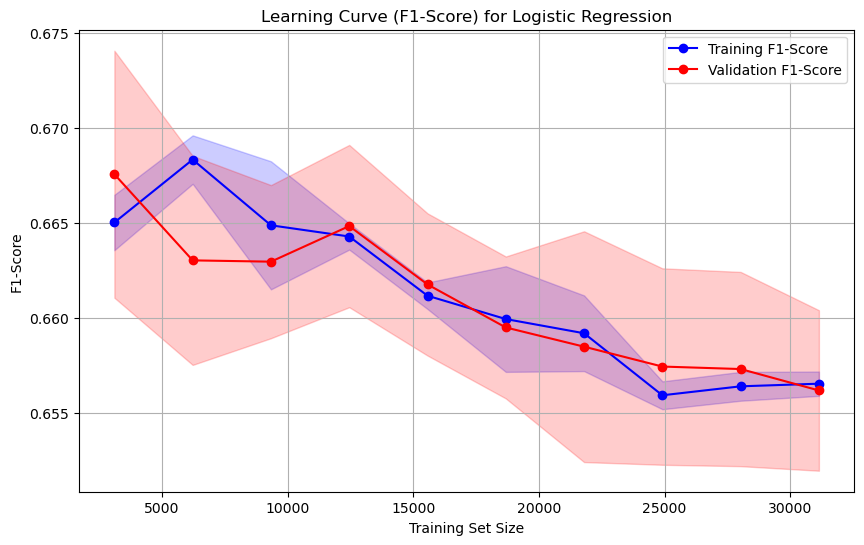

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import learning_curve

lr_model = LogisticRegression(
    solver='liblinear',  
    penalty='l2',        
    C=1.0,               
    random_state=42
)

lr_model.fit(X_train_norm, y_train)

y_pred = lr_model.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X_train_norm, y_train, cv=5, scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training F1-Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, 'o-', color="red", label="Validation F1-Score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("F1-Score")
plt.title("Learning Curve (F1-Score) for Logistic Regression")
plt.legend(loc="best")
plt.grid()
plt.show()


## With downsampling  the non_fraud dataset

In [230]:
fraud = pd.read_csv("../data/processed/2-EDA/fraud.csv",delimiter=",")
non_fraud = pd.read_csv("../data/processed/2-EDA/non_fraud.csv",delimiter=",")

In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


In [232]:

fraud_train, fraud_test = train_test_split(fraud, test_size=0.4, random_state=42, stratify=fraud['is_fraud'])
non_fraud_train, non_fraud_test = train_test_split(non_fraud, test_size=0.4, random_state=42, stratify=non_fraud['is_fraud'])

non_fraud_train_downsampled = non_fraud_train.sample(n=14873, random_state=42)

train_data = pd.concat([fraud_train, non_fraud_train_downsampled], axis=0).sample(frac=1, random_state=42)  # Shuffle

test_data = pd.concat([fraud_test, non_fraud_test], axis=0).sample(frac=1, random_state=42)  # Shuffle

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(f"Training Set Size: {train_data.shape}")
print(f"Test Set Size: {test_data.shape}")
print(f"Fraud Cases in Train: {train_data['is_fraud'].sum()}")
print(f"Fraud Cases in Test: {test_data['is_fraud'].sum()}")


Training Set Size: (23796, 8)
Test Set Size: (25950, 8)
Fraud Cases in Train: 8923
Fraud Cases in Test: 5950


In [233]:
train_data

,Call_Type,Call_Duration,IMEI,TAC,DESTINATION_CAT,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH,is_fraud
0,6,2.000000,2629,1199,ON-NET,Smartphone,4G,0
1,1,12.294828,10324,3795,ON-NET,Smartphone,4G,0
2,7,2.000000,14990,186,ON-NET,Smartphone,4G,1
3,0,75.660480,508,433,ON-NET,Smartphone,4G,0
4,1,33.101460,6633,2689,OFF-NET,Smartphone,4G,0
...,...,...,...,...,...,...,...,...
23791,0,13.240584,10497,3839,ON-NET,Smartphone,4G,0
23792,6,2.000000,14686,176,ON-NET,Smartphone,4G,1
23793,6,2.000000,1495,5548,ON-NET,Smartphone,4G,1
23794,0,18.915120,6528,2645,ON-NET,Smartphone,4G,0


In [234]:
columns_to_check = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

for col in columns_to_check:
    unique_values = train_data[col].unique()
    print(f"Column: {col}")
    print(unique_values)  
    print("------")


columns_to_check = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

for col in columns_to_check:
    unique_values = test_data[col].unique()
    print(f"Column: {col}")
    print(unique_values)  
    print("------")


Column: DESTINATION_CAT
['ON-NET' 'OFF-NET' 'OTA-SHORT' 'INTERNATIONAL']
------
Column: MU_Device_type_Segment
['Smartphone' 'Basic & Feature Phone' 'Other' 'Tablet' 'Modem']
------
Column: MU_HANDSET_MOBILE_TECH
['4G' '2G' '3G']
------
Column: DESTINATION_CAT
['ON-NET' 'OTA-SHORT' 'OFF-NET' 'INTERNATIONAL']
------
Column: MU_Device_type_Segment
['Smartphone' 'Basic & Feature Phone' 'Other' 'Modem' 'Tablet']
------
Column: MU_HANDSET_MOBILE_TECH
['4G' '3G' '2G']
------


In [235]:
import pandas as pd

columns_to_encode = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

train_data = pd.get_dummies(train_data, columns=columns_to_encode, dtype=int)
test_data = pd.get_dummies(test_data, columns=columns_to_encode, dtype=int)


train_data.head()


,Call_Type,Call_Duration,IMEI,TAC,is_fraud,DESTINATION_CAT_INTERNATIONAL,DESTINATION_CAT_OFF-NET,DESTINATION_CAT_ON-NET,DESTINATION_CAT_OTA-SHORT,MU_Device_type_Segment_Basic & Feature Phone,MU_Device_type_Segment_Modem,MU_Device_type_Segment_Other,MU_Device_type_Segment_Smartphone,MU_Device_type_Segment_Tablet,MU_HANDSET_MOBILE_TECH_2G,MU_HANDSET_MOBILE_TECH_3G,MU_HANDSET_MOBILE_TECH_4G
0,6,2.000000,2629,1199,0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,12.294828,10324,3795,0,0,0,1,0,0,0,0,1,0,0,0,1
2,7,2.000000,14990,186,1,0,0,1,0,0,0,0,1,0,0,0,1
3,0,75.660480,508,433,0,0,0,1,0,0,0,0,1,0,0,0,1
4,1,33.101460,6633,2689,0,0,1,0,0,0,0,0,1,0,0,0,1


In [236]:
X_train = train_data.drop(columns=["is_fraud"])
y_train = train_data["is_fraud"]


X_test = test_data.drop(columns=["is_fraud"])
y_test = test_data["is_fraud"]

In [237]:
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)



In [238]:
model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=10,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    random_state=42,
    n_jobs=-1                 
)

model.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [239]:
y_pred = model.predict(X_test_norm)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9984
Recall: 1.0000
Precision: 0.9930
F1 Score: 0.9965


Cross-Validation Accuracy Scores: [0.98655462 0.9783568  0.991805   0.98676192 0.98781257]
Mean Accuracy: 0.9863
Standard Deviation: 0.0044
Cross-Validated Accuracy: 0.9863
Cross-Validated Recall: 0.9701
Cross-Validated Precision: 0.9931
Cross-Validated F1 Score: 0.9815


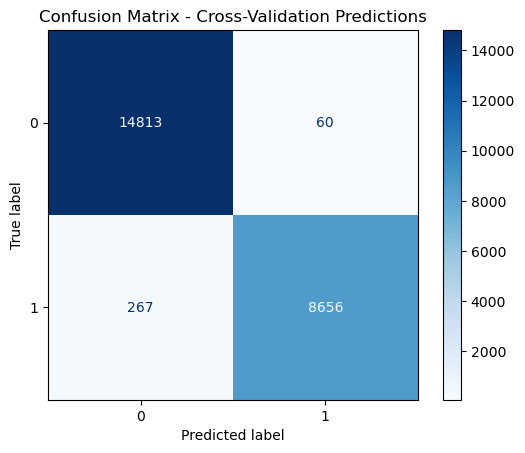

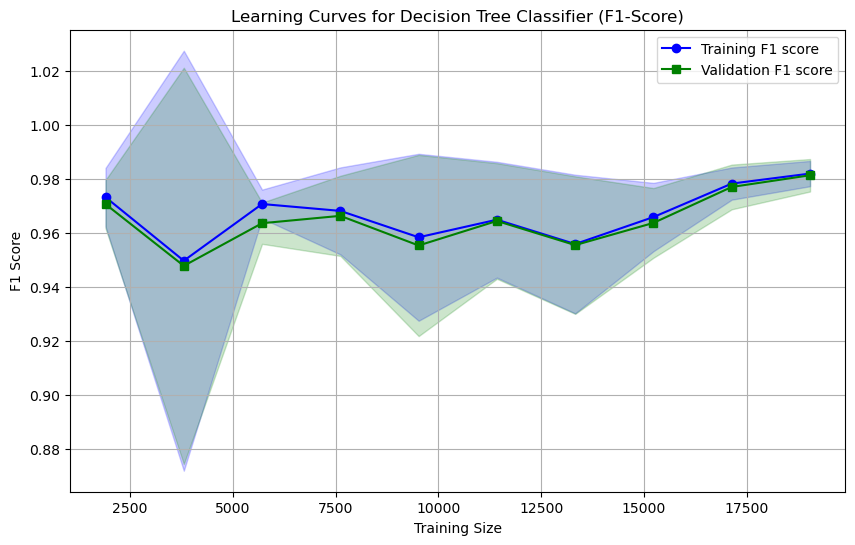

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, learning_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',          
    max_depth=10,              
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',       
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(dt_model, X_train_norm, y_train, cv=cv, scoring="accuracy")

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

y_cv_pred = cross_val_predict(dt_model, X_train_norm, y_train, cv=cv)

# Evaluate model performance
cv_accuracy = accuracy_score(y_train, y_cv_pred)
cv_recall = recall_score(y_train, y_cv_pred)
cv_precision = precision_score(y_train, y_cv_pred)
cv_f1 = f1_score(y_train, y_cv_pred)

print(f"Cross-Validated Accuracy: {cv_accuracy:.4f}")
print(f"Cross-Validated Recall: {cv_recall:.4f}")
print(f"Cross-Validated Precision: {cv_precision:.4f}")
print(f"Cross-Validated F1 Score: {cv_f1:.4f}")

cm = confusion_matrix(y_train, y_cv_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Cross-Validation Predictions")
plt.show()

# Plot learning curves based on F1 score
train_sizes, train_scores, validation_scores = learning_curve(
    dt_model, X_train_norm, y_train, cv=cv, scoring="f1", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training F1 score", color="blue", marker="o")
plt.plot(train_sizes, validation_scores_mean, label="Validation F1 score", color="green", marker="s")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, color="green", alpha=0.2)

# Add titles and labels
plt.title("Learning Curves for Decision Tree Classifier (F1-Score)")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

lr_model = LogisticRegression(
    solver='liblinear',  
    penalty='l2',        
    C=1.0,               
    random_state=42
)

# Train the model
lr_model.fit(X_train_norm, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_norm)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8883
Recall: 0.8496
Precision: 0.7161
F1 Score: 0.7772


## Using upsampling on fraud dataset

In [242]:
fraud = pd.read_csv("../data/processed/2-EDA/fraud.csv",delimiter=",")
non_fraud = pd.read_csv("../data/processed/2-EDA/non_fraud.csv",delimiter=",")

In [243]:
fraud


,Call_Type,Call_Duration,IMEI,TAC,DESTINATION_CAT,MU_Device_type_Segment,MU_HANDSET_MOBILE_TECH,is_fraud
0,0,25.535412,9234,5790,ON-NET,Basic & Feature Phone,2G,1
1,7,2.000000,13327,134,OTA-SHORT,Smartphone,4G,1
2,7,2.000000,9234,5790,OFF-NET,Basic & Feature Phone,2G,1
3,7,2.000000,1796,5563,OTA-SHORT,Smartphone,4G,1
4,7,2.000000,14769,179,ON-NET,Modem,3G,1
...,...,...,...,...,...,...,...,...
14868,1,9.457560,4999,5664,OFF-NET,Basic & Feature Phone,2G,1
14869,0,67.148676,1936,5572,ON-NET,Tablet,3G,1
14870,0,147.537936,14543,172,ON-NET,Smartphone,4G,1
14871,0,55.799604,4060,5633,ON-NET,Smartphone,4G,1


In [244]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Split the data into training and testing sets
fraud_train, fraud_test = train_test_split(fraud, test_size=0.4, random_state=42, stratify=fraud['is_fraud'])
non_fraud_train, non_fraud_test = train_test_split(non_fraud, test_size=0.4, random_state=42, stratify=non_fraud['is_fraud'])

non_fraud_train_downsampled = non_fraud_train.sample(n=14873, random_state=42)

fraud_train_upsampled = resample(
    fraud_train, 
    replace=True,        
    n_samples=50000,     
    random_state=42      
)

train_data = pd.concat([fraud_train_upsampled, non_fraud_train_downsampled], axis=0).sample(frac=1, random_state=42)  # Shuffle

test_data = pd.concat([fraud_test, non_fraud_test], axis=0).sample(frac=1, random_state=42)  # Shuffle

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(f"Training Set Size: {train_data.shape}")
print(f"Test Set Size: {test_data.shape}")
print(f"Fraud Cases in Train: {train_data['is_fraud'].sum()}")
print(f"Fraud Cases in Test: {test_data['is_fraud'].sum()}")


Training Set Size: (64873, 8)
Test Set Size: (25950, 8)
Fraud Cases in Train: 50000
Fraud Cases in Test: 5950


In [246]:
columns_to_check = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

for col in columns_to_check:
    unique_values = train_data[col].unique()
    print(f"Column: {col}")
    print(unique_values) 
    print("------")


columns_to_check = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

for col in columns_to_check:
    unique_values = test_data[col].unique()
    print(f"Column: {col}")
    print(unique_values)  
    print("------")


Column: DESTINATION_CAT
['ON-NET' 'OFF-NET' 'OTA-SHORT' 'INTERNATIONAL']
------
Column: MU_Device_type_Segment
['Smartphone' 'Basic & Feature Phone' 'Tablet' 'Modem' 'Other']
------
Column: MU_HANDSET_MOBILE_TECH
['4G' '2G' '3G']
------
Column: DESTINATION_CAT
['ON-NET' 'OTA-SHORT' 'OFF-NET' 'INTERNATIONAL']
------
Column: MU_Device_type_Segment
['Smartphone' 'Basic & Feature Phone' 'Other' 'Modem' 'Tablet']
------
Column: MU_HANDSET_MOBILE_TECH
['4G' '3G' '2G']
------


In [247]:
import pandas as pd

columns_to_encode = ["DESTINATION_CAT", "MU_Device_type_Segment", "MU_HANDSET_MOBILE_TECH"]

train_data = pd.get_dummies(train_data, columns=columns_to_encode, dtype=int)
test_data = pd.get_dummies(test_data, columns=columns_to_encode, dtype=int)


train_data.head()


,Call_Type,Call_Duration,IMEI,TAC,is_fraud,DESTINATION_CAT_INTERNATIONAL,DESTINATION_CAT_OFF-NET,DESTINATION_CAT_ON-NET,DESTINATION_CAT_OTA-SHORT,MU_Device_type_Segment_Basic & Feature Phone,MU_Device_type_Segment_Modem,MU_Device_type_Segment_Other,MU_Device_type_Segment_Smartphone,MU_Device_type_Segment_Tablet,MU_HANDSET_MOBILE_TECH_2G,MU_HANDSET_MOBILE_TECH_3G,MU_HANDSET_MOBILE_TECH_4G
0,6,2.000000,12355,101,1,0,0,1,0,0,0,0,1,0,0,0,1
1,6,2.000000,1796,5563,1,0,0,1,0,0,0,0,1,0,0,0,1
2,6,2.000000,6804,5723,1,0,0,1,0,0,0,0,1,0,0,0,1
3,0,256.299876,10385,40,1,0,1,0,0,0,0,0,1,0,0,0,1
4,6,2.000000,1379,5538,1,0,0,1,0,0,0,0,1,0,0,0,1


In [248]:
X_train = train_data.drop(columns=["is_fraud"])
y_train = train_data["is_fraud"]


X_test = test_data.drop(columns=["is_fraud"])
y_test = test_data["is_fraud"]

In [249]:
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)



In [250]:
model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=10,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    random_state=42
    n_jobs=-1                 
)

model.fit(X_train_norm, y_train)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2907182961.py, line 6)

In [184]:
y_pred = model.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9981
Recall: 1.0000
Precision: 0.9917
F1 Score: 0.9958


Cross-Validation Accuracy Scores: [0.98651252 0.98535645 0.9895183  0.9827347  0.98697395]
Mean Accuracy: 0.9862
Standard Deviation: 0.0022
Cross-Validated Accuracy: 0.9862
Cross-Validated Recall: 0.9877
Cross-Validated Precision: 0.9944
Cross-Validated F1 Score: 0.9910


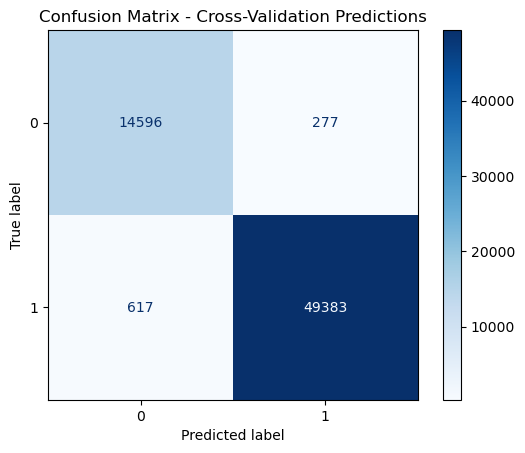

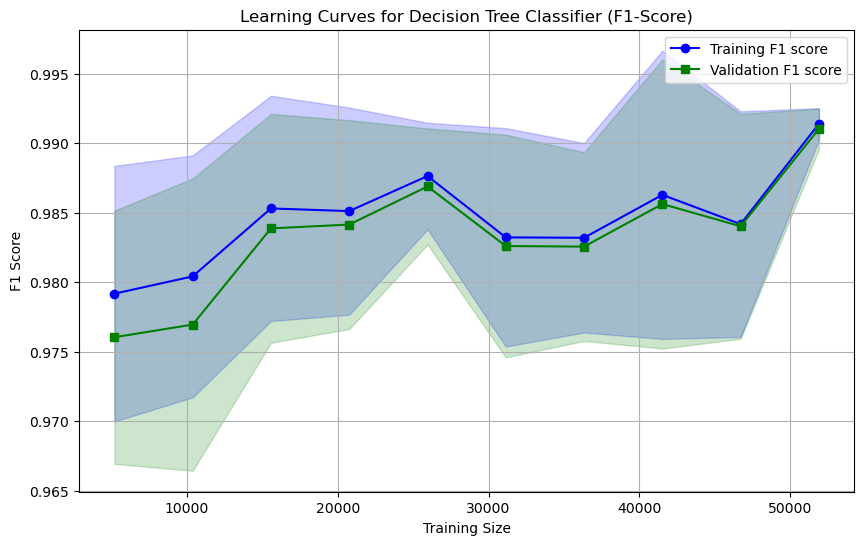

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, learning_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',          
    max_depth=10,              
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',       
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(dt_model, X_train_norm, y_train, cv=cv, scoring="accuracy")

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

y_cv_pred = cross_val_predict(dt_model, X_train_norm, y_train, cv=cv)

cv_accuracy = accuracy_score(y_train, y_cv_pred)
cv_recall = recall_score(y_train, y_cv_pred)
cv_precision = precision_score(y_train, y_cv_pred)
cv_f1 = f1_score(y_train, y_cv_pred)

print(f"Cross-Validated Accuracy: {cv_accuracy:.4f}")
print(f"Cross-Validated Recall: {cv_recall:.4f}")
print(f"Cross-Validated Precision: {cv_precision:.4f}")
print(f"Cross-Validated F1 Score: {cv_f1:.4f}")

cm = confusion_matrix(y_train, y_cv_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Cross-Validation Predictions")
plt.show()

train_sizes, train_scores, validation_scores = learning_curve(
    dt_model, X_train_norm, y_train, cv=cv, scoring="f1", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training F1 score", color="blue", marker="o")
plt.plot(train_sizes, validation_scores_mean, label="Validation F1 score", color="green", marker="s")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, color="green", alpha=0.2)

plt.title("Learning Curves for Decision Tree Classifier (F1-Score)")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

lr_model = LogisticRegression(
    solver='liblinear',  
    penalty='l2',        
    C=1.0,               
    random_state=42
)

# Train the model
lr_model.fit(X_train_norm, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_norm)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6494
Recall: 0.9402
Precision: 0.3902
F1 Score: 0.5515
